## PYTHON DEV TASK

In [11]:
import json
import requests
import pandas as pd
import csv
import os
from datetime import datetime

In [19]:
def validate_and_assign_serial_numbers(data):
    # Define the serial number range
    serial_number_range = range(1470, 1479)
    
    # Reverse the serial number range
    reversed_serial_numbers = [f"C25CTW0000000000{str(i).zfill(4)}" for i in reversed(serial_number_range)]
    
    # Validate the data schema
    if "Internet_hubs" not in data:
        return "Invalid data schema"
    
    # Assign serial numbers to Internet hubs
    for i, hub in enumerate(data["Internet_hubs"]):
        if hub["id"] != "men1":  # Skip the first hub with a predefined serial number
            hub["serial_number"] = reversed_serial_numbers[i-1] if i > 0 else reversed_serial_numbers[0]
    
    return data

# Example usage
data = {
    "comment": "Do NOT commit local changes to this file to source control",
    "Internet_hubs": [
        {"id": "men1", "serial_number": "C25CTW00000000001470"},
        {"id": "mn1", "serial_number": "<serial number here>"},
        {"id": "mn2", "serial_number": "<serial number here>"},
        {"id": "mn3", "serial_number": "<serial number here>"},
        {"id": "mn4", "serial_number": "<serial number here>"},
        {"id": "mn5", "serial_number": "<serial number here>"},
        {"id": "mn6", "serial_number": "<serial number here>"},
        {"id": "mn7", "serial_number": "<serial number here>"},
        {"id": "mn8", "serial_number": "<serial number here>"},
        {"id": "mn9", "serial_number": "<serial number here>"}
    ]
}

updated_data = validate_and_assign_serial_numbers(data)
print(json.dumps(updated_data, indent=4))


{
    "comment": "Do NOT commit local changes to this file to source control",
    "Internet_hubs": [
        {
            "id": "men1",
            "serial_number": "C25CTW00000000001470"
        },
        {
            "id": "mn1",
            "serial_number": "C25CTW00000000001478"
        },
        {
            "id": "mn2",
            "serial_number": "C25CTW00000000001477"
        },
        {
            "id": "mn3",
            "serial_number": "C25CTW00000000001476"
        },
        {
            "id": "mn4",
            "serial_number": "C25CTW00000000001475"
        },
        {
            "id": "mn5",
            "serial_number": "C25CTW00000000001474"
        },
        {
            "id": "mn6",
            "serial_number": "C25CTW00000000001473"
        },
        {
            "id": "mn7",
            "serial_number": "C25CTW00000000001472"
        },
        {
            "id": "mn8",
            "serial_number": "C25CTW00000000001471"
        },
        {
     

## Here's an explanation of the code:

1. We define a function validate_and_assign_serial_numbers that takes a JSON data object as input.
2. We define the serial number range and reverse it to assign the serial numbers in reverse order.
3. We validate the data schema by checking if the "Internet_hubs" key exists.
4. We iterate through the Internet hubs and assign a serial number to each hub, skipping the first hub with a predefined serial number.
5. Finally, we return the updated data object.

The example usage demonstrates how to call the function with a sample data object and print the updated data in a pretty JSON format.

In [21]:
def fetch_customer_addresses():
    # API configuration
    API_KEY = "ssfdsjfksjdhfgjfgvjdshgvshgkjsdlgvkjsdgjkl"
    BASE_URL = "https://pysoftware.com/v1"
    HEADERS = {"X-API-KEY": API_KEY}
    
    # Step 1: Get total number of customers
    try:
        response = requests.get(f"{BASE_URL}/customer_numbers", headers=HEADERS)
        response.raise_for_status()
        total_customers = int(response.text)
        print(f"Found {total_customers} customers")
    except Exception as e:
        print(f"Error fetching customer count: {e}")
        return None, None
    
    # Step 2: Fetch and validate addresses for all customers
    valid_addresses = []
    for customer_num in range(1, total_customers + 1):
        try:
            response = requests.get(
                f"{BASE_URL}/address_inventory/{customer_num}", 
                headers=HEADERS
            )
            response.raise_for_status()
            address = response.json()
            
            # Validate and clean address
            clean_address = validate_address(address)
            if clean_address:
                valid_addresses.append(clean_address)
            else:
                print(f"Invalid address data for customer {customer_num}")
        except Exception as e:
            print(f"Error fetching address for customer {customer_num}: {e}")
    
    # Step 3: Convert to DataFrame for tabular format
    if not valid_addresses:
        print("No valid addresses found")
        return None, None
    
    addresses_df = pd.DataFrame(valid_addresses)
    
    # Step 4: Save to CSV file
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f"customer_addresses_{timestamp}.csv"
    file_path = os.path.abspath(filename)
    
    addresses_df.to_csv(file_path, index=False)
    
    # Step 5: Report file information
    print(f"Saved {len(valid_addresses)} addresses to: {file_path}")
    
    return addresses_df, file_path

In [23]:
# Define the Address Validation Function

def validate_address(address):
    """Validates and cleans an address dictionary"""
    try:
        # Check required fields
        required_fields = ["id", "first_name", "last_name", "street", 
                           "postcode", "state", "country", "lat", "lon"]
        
        for field in required_fields:
            if field not in address:
                return None
        
        # Create cleaned address dict
        clean_address = {}
        
        # Validate id (should be integer)
        try:
            clean_address["id"] = int(address["id"])
        except (ValueError, TypeError):
            return None
        
        # Validate strings
        str_fields = ["first_name", "last_name", "street", "postcode", "state", "country"]
        for field in str_fields:
            if not isinstance(address[field], str):
                return None
            clean_address[field] = address[field].strip()
        
        # Validate coordinates
        try:
            lat = float(address["lat"])
            lon = float(address["lon"])
            
            # Basic range check
            if not (-90 <= lat <= 90) or not (-180 <= lon <= 180):
                return None
                
            clean_address["lat"] = lat
            clean_address["lon"] = lon
        except (ValueError, TypeError):
            return None
            
        return clean_address
    except Exception:
        return None

In [ ]:
if __name__ == "__main__":
    # Execute the function
    addresses_df, csv_path = fetch_customer_addresses()
    
    # Display the results
    if addresses_df is not None:
        print("\nCustomer Addresses:")
        print(addresses_df)
        print(f"\nCSV file saved at: {csv_path}")
    else:
        print("Failed to retrieve customer addresses")

## Here's an explanation of the code:

1. We send a GET request to the /customer_numbers endpoint to retrieve the total number of customers.
2. We iterate over each customer number, sending a GET request to the /address_inventory/{customer_number} endpoint to retrieve the customer's address.
3. We clean and validate the address data, ensuring that each field is of the correct type and format.
4. We append the cleaned address data to a list.
5. We write the customer addresses to a CSV file using the csv module.
6. We print the CSV file name and path.
7. We print the customer addresses in a tabular form using the tabulate module.

# WHERE DATA ANALYSIS COMES IN

In [16]:
#Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#import warnings
#warnings.filterwarnings('ignore')

In [18]:
#importing file

suicide = pd.read_csv('Suicide Deaths by Age.csv')

suicide

,index,Year,Age,Suicides
0,0,1981,10,0
1,1,1981,11,0
2,2,1981,12,2
3,3,1981,13,2
4,4,1981,14,1
...,...,...,...,...
2955,2955,2017,85,18
2956,2956,2017,86,23
2957,2957,2017,87,14
2958,2958,2017,88,17


In [20]:
suicide.info()

suicide.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2960 entries, 0 to 2959
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   index     2960 non-null   int64
 1   Year      2960 non-null   int64
 2   Age       2960 non-null   int64
 3   Suicides  2960 non-null   int64
dtypes: int64(4)
memory usage: 92.6 KB


,index,Year,Age,Suicides
count,2960.000000,2960.000000,2960.000000,2960.000000
mean,1479.500000,1999.000000,49.500000,63.607432
std,854.622724,10.678882,23.096108,36.031265
min,0.000000,1981.000000,10.000000,0.000000
25%,739.750000,1990.000000,29.750000,32.750000
50%,1479.500000,1999.000000,49.500000,67.000000
75%,2219.250000,2008.000000,69.250000,93.000000
max,2959.000000,2017.000000,89.000000,154.000000


In [22]:
#- Ages 18-34 are classified as "Young".
#- Ages 35-64 are classified as "Middle Age".
#- Ages 65 and above are classified as "Old".
#- Ages below 0 are classified as "Unknown"

suicide['Age Group'] = suicide['Age'].apply(lambda x: 
                                       'Young' if x >= 18 and x <= 34 
                                       else 'Middle Age' if x >= 35 and x <= 64 
                                       else 'Old' if x >= 65 
                                       else 'Unknown' if x < 0 
                                       else 'Minor')

suicide


,index,Year,Age,Suicides,Age Group
0,0,1981,10,0,Minor
1,1,1981,11,0,Minor
2,2,1981,12,2,Minor
3,3,1981,13,2,Minor
4,4,1981,14,1,Minor
...,...,...,...,...,...
2955,2955,2017,85,18,Old
2956,2956,2017,86,23,Old
2957,2957,2017,87,14,Old
2958,2958,2017,88,17,Old


# 1.) Age Distribution of Suicides (1981-1983)
 Distribution of Suicides by Age Group

C:\Users\user\AppData\Local\Temp\ipykernel_17860\56567726.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_totals = grouped_data.groupby('Age Class')['Suicides'].sum()


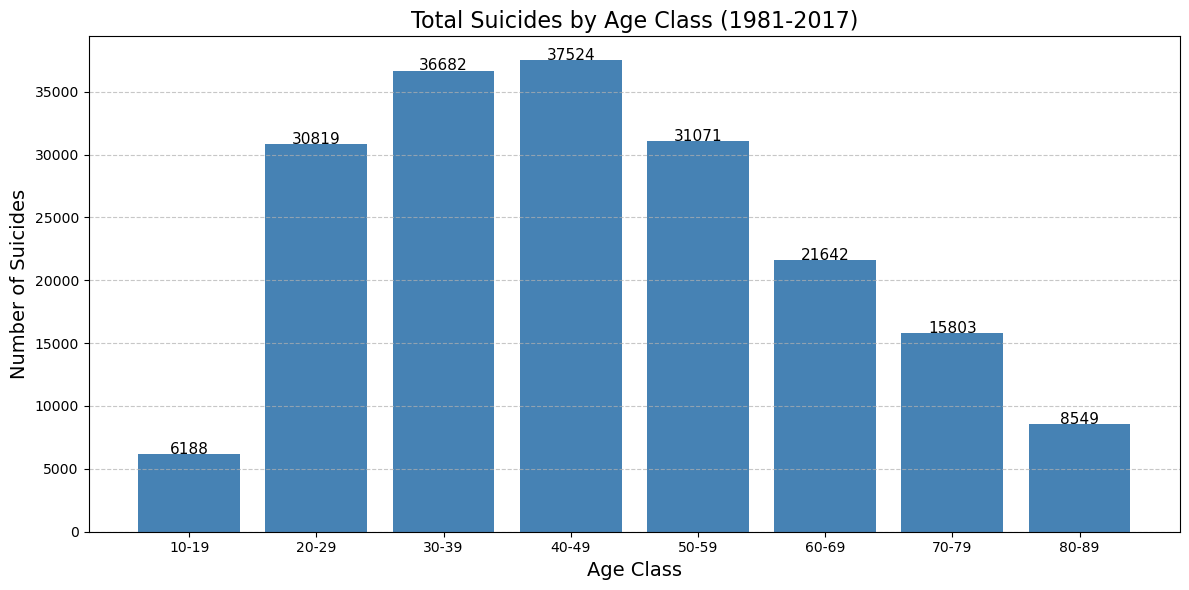

In [25]:
# Create age groups for better visualization
def create_age_groups(suicide):
    bins = [9, 19, 29, 39, 49, 59, 69, 79, 89]
    labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']
    suicide['Age Class'] = pd.cut(suicide['Age'], bins=bins, labels=labels, right=True)
    return suicide

# Group data by age groups and calculate total suicides
grouped_data = create_age_groups(suicide)
age_group_totals = grouped_data.groupby('Age Class')['Suicides'].sum()

# Create bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(age_group_totals.index, age_group_totals.values, color='steelblue')
plt.title('Total Suicides by Age Class (1981-2017)', fontsize=16)
plt.xlabel('Age Class', fontsize=14)
plt.ylabel('Number of Suicides', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
            f'{int(height)}', ha='center', fontsize=11)

plt.tight_layout()
plt.savefig('suicides_by_age_group.png', dpi=300)

# ANALYSIS: 

Total Suicide Count
The total suicide count from 1981 to 2017 in the USA is approximately 251,878.

Age Group Distribution
The age group distribution of suicide counts is as follows:

- 10-19: 6188 (2.5%)
- 20-29: 30819 (12.2%)
- 30-39: 36682 (14.6%)
- 40-49: 37524 (14.9%)
- 50-59: 31071 (12.3%)
- 60-69: 21642 (8.6%)
- 70-79: 15803 (6.3%)
- 80-89: 8549 (3.4%)

Key Observations
1. The highest number of suicides occurs in the 40-49 age group, accounting for 14.9% of total suicides.
2. The 30-39 and 50-59 age groups also have high suicide counts, accounting for 14.6% and 12.3% of total suicides, respectively.
3. The youngest age group (10-19) has the lowest suicide count, accounting for only 2.5% of total suicides.
4. There is a general decline in suicide counts with increasing age, with the exception of the 40-49 age group.

Potential Implications
1. Middle-aged adults (40-49) may be at higher risk of suicide due to factors such as career pressures, financial stress, and family responsibilities.
2. Young adults (20-29) and older adults (60-69) may also be vulnerable to suicide due to factors such as mental health issues, social isolation, and declining physical health.
3. The low suicide count among the youngest age group (10-19) may indicate that prevention efforts and mental health support are more effective for this age group


# Heatmap Analysis of Age and Year

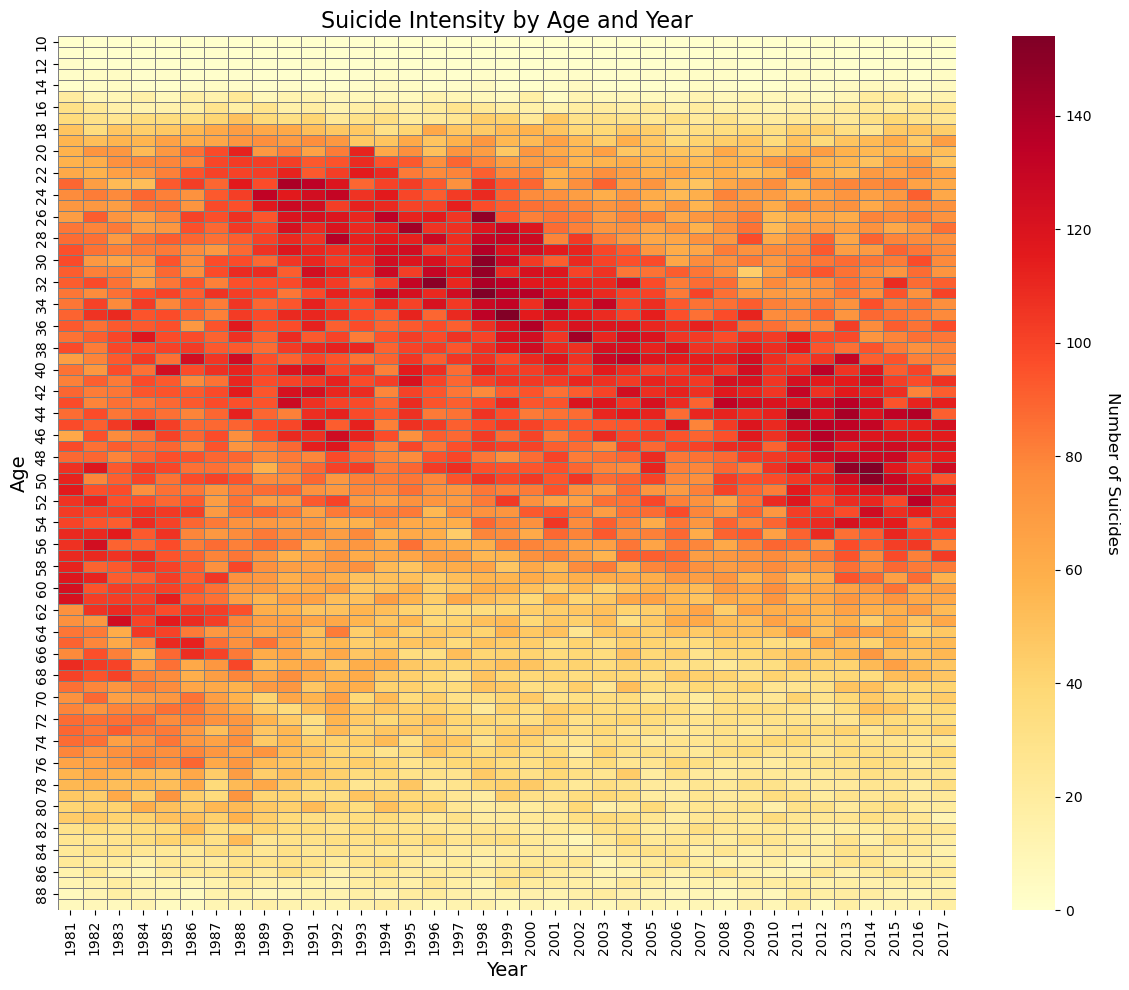

In [29]:
# Code for creating the heatmap
# Create a pivot table for the heatmap
pivot_data = suicide.pivot(index='Age', columns='Year', values='Suicides')

plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(pivot_data, cmap='YlOrRd', annot=False, 
                     linewidths=0.5, linecolor='gray')
plt.title('Suicide Intensity by Age and Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.tight_layout()

# Add colorbar label
cbar = heatmap.collections[0].colorbar
cbar.set_label('Number of Suicides', rotation=270, labelpad=20, fontsize=12)

plt.savefig('suicide_heatmap.png', dpi=300)